# Environmental Audio Classification with Pytorch and Librosa

Based on: https://medium.com/@hasithsura/audio-classification-d37a82d6715

## 0. Install packages

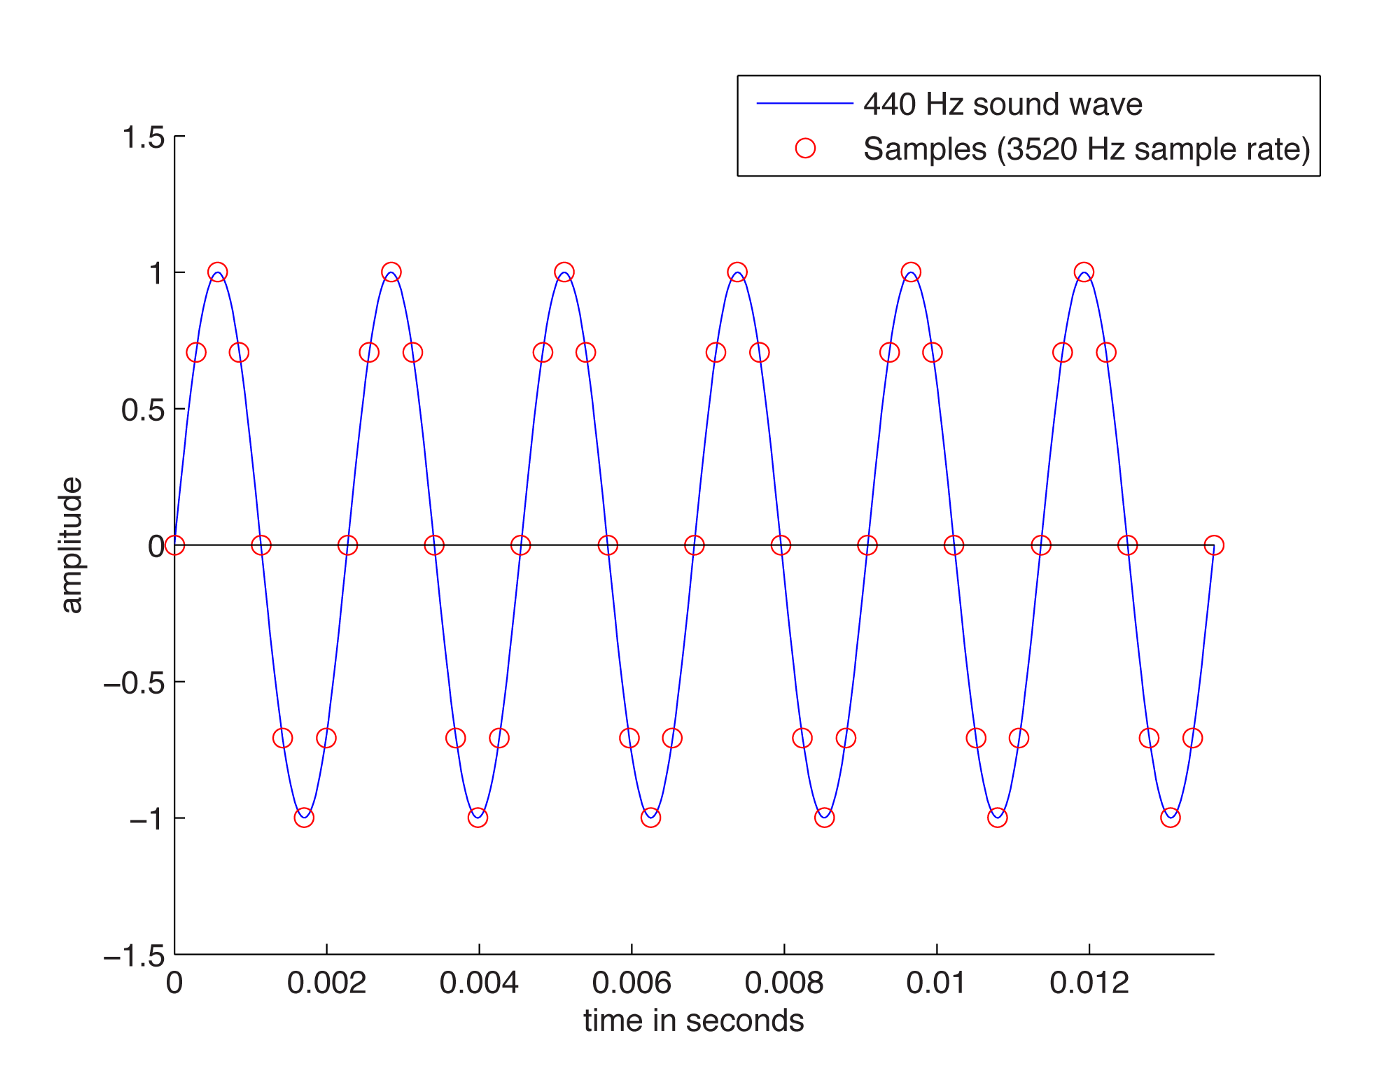

## 1. Getting the data for training

In [4]:
!mkdir Audio

mkdir: Audio: File exists


In [5]:
cd Audio

/Users/michielbontenbal/Documents/GitHub/Notebooks/Audio


In [6]:
!git clone https://github.com/karolpiczak/ESC-50

Cloning into 'ESC-50'...
remote: Enumerating objects: 4184, done.
remote: Counting objects: 100% (48/48), done.  66% (32/48)
remote: Compressing objects: 100% (38/38), done.
^Cceiving objects:   1% (49/4184), 3.32 MiB | 6.00 KiB/s   
fetch-pack: unexpected disconnect while reading sideband packet


In [7]:
ls

In [ ]:
## Data processing and getting the spectrogram

In [10]:
#get the melspectrogram with librosa
import numpy as np
import librosa
def get_melspectrogram_db(file_path, sr=None, n_fft=2048, hop_length=512, n_mels=128, fmin=20, fmax=8300, top_db=80):
  wav,sr = librosa.load(file_path,sr=sr)
  if wav.shape[0]<5*sr:
    wav=np.pad(wav,int(np.ceil((5*sr-wav.shape[0])/2)),mode='reflect')
  else:
    wav=wav[:5*sr]
  spec=librosa.feature.melspectrogram(wav, sr=sr, n_fft=n_fft,
              hop_length=hop_length,n_mels=n_mels,fmin=fmin,fmax=fmax)
  spec_db=librosa.power_to_db(spec,top_db=top_db)
  return spec_db

In [13]:
#A function to convert the spectrogram into an image

def spec_to_image(spec, eps=1e-6):
  mean = spec.mean()
  std = spec.std()
  spec_norm = (spec - mean) / (std + eps)
  spec_min, spec_max = spec_norm.min(), spec_norm.max()
  spec_scaled = 255 * (spec_norm - spec_min) / (spec_max - spec_min)
  spec_scaled = spec_scaled.astype(np.uint8)
  return spec_scaled


In [18]:
!ls

In [22]:
ls

In [15]:
import numpy as np
import pandas as pd
from torch.utils.data import Dataset, DataLoader
from tqdm import tqdm
class ESC50Data(Dataset):
  def __init__(self, base, df, in_col, out_col):
    self.df = df
    self.data = []
    self.labels = []
    self.c2i={}
    self.i2c={}
    self.categories = sorted(df[out_col].unique())
    for i, category in enumerate(self.categories):
      self.c2i[category]=i
      self.i2c[i]=category
    for ind in tqdm(range(len(df))):
      row = df.iloc[ind]
      file_path = os.path.join(base,row[in_col])
      self.data.append(spec_to_image(get_melspectrogram_db(file_path))[np.newaxis,...])
      self.labels.append(self.c2i[row['category']])
  def __len__(self):
    return len(self.data)
  def __getitem__(self, idx):
    return self.data[idx], self.labels[idx]

train_data = ESC50Data('audio', train, 'filename', 'category')
valid_data = ESC50Data('audio', valid, 'filename', 'category')
train_loader = DataLoader(train_data, batch_size=16, shuffle=True)
valid_loader = DataLoader(valid_data, batch_size=16, shuffle=True)

NameError: name 'train' is not defined